In [21]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf   
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [22]:
som_dimensions = (20,20)  # dimensions of the SOM <= (rows, cols)
som_rectangular_grid_radius = 2  # size of the neighbourhood the SOM considers when doing the update
training_set_size = 2000  # number of samples we use from the training set
num_epochs = 1    # number of iterations of the algorithm we wish to run
learning_rate = 0.05  # learning rate (alpha)
mnist_size = 28 # dimensions of the images

In [23]:
class SOM():
    def __init__(self):
        # make a Kohonen layer and initialize all the neurons with random weights
        self.kohonen = np.random.rand(som_dimensions[0]*som_dimensions[1]*mnist_size**2)
        self.kohonen = np.reshape(self.kohonen, (som_dimensions[0], som_dimensions[1], mnist_size, mnist_size))
        print(self.kohonen.shape)
    def train(self, x_train):
        i = 1
        while i <= num_epochs:
            print('Training on epoch {}'.format(i), end='... ', flush=True)
            self._train_one_epoch(x_train)
            print('Epoch {} complete'.format(i), flush=True)
            i += 1            
        print('Training complete.', flush=True)
    
    def _train_one_epoch(self, x_train):
        point = [-1,-1]
        for vector in x_train:
            min_dist = np.Infinity
            for i in range(som_dimensions[0]):
                for j in range(som_dimensions[1]):
                    dist = np.sqrt(np.sum((vector.reshape(-1, mnist_size) - self.kohonen[i][j]) ** 2))
                    if dist < min_dist:
                        min_dist = dist
                        point = [i, j]
        
            self._update_weights(point, vector)
        
    def _update_weights(self, point, vector):
        def isValidPoint(point):
            if point[0] < 0 or point[0] >= som_dimensions[0]:
                return False
            elif point[1] < 0 or point[1] >= som_dimensions[1]:
                return False
            return True
        
        x_diff = -som_rectangular_grid_radius
        # change weights of all points in the neighborhood
        while x_diff <= som_rectangular_grid_radius:
            y_diff = -som_rectangular_grid_radius
            
            while y_diff <= som_rectangular_grid_radius:
                if isValidPoint([point[0]+x_diff, point[1]+y_diff]):
                    # update weights
                    delta = vector.reshape(-1, mnist_size) - self.kohonen[point[0]+x_diff][point[1]+y_diff]
                    self.kohonen[point[0]+x_diff][point[1]+y_diff] += learning_rate * delta
                y_diff += 1
            
            x_diff += 1

In [24]:
#in case we want to use an 8x8 dataset. Don't forget to change the size of mnist and dimension of SOM
#digits = datasets.load_digits()
#print(digits)
#X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.5, shuffle=False)

In [25]:
from tensorflow.keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [26]:
# checking if the dataset loaded correctly
print(X_train.shape)
print(type(X_train[0][0]))

(60000, 28, 28)
<class 'numpy.ndarray'>


In [27]:
# creating an instance of our SOM class, this will be used to perform operations
train_SOM = SOM()
# training our SOM
train_SOM.train(X_train)

(20, 20, 28, 28)
Training on epoch 1... Epoch 1 complete
Training complete.


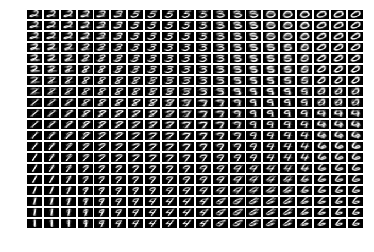

<Figure size 7200x7200 with 0 Axes>

In [28]:
fig, axs = plt.subplots(nrows=som_dimensions[0], ncols=som_dimensions[1])
plt.axis('off')
plt.xticks(color='w')
plt.yticks(color='w')
plt.figure(figsize=(100,100))

for i in range(som_dimensions[0]):
    for j in range(som_dimensions[1]):
        axs[i, j].imshow(train_SOM.kohonen[i][j], aspect='auto', cmap='gray')

i=0
for row in axs:
    j=0
    for col in row:
        col.imshow(train_SOM.kohonen[i][j], aspect = 'auto', cmap='gray')
        col.axis('off')
        j += 1
    i += 1
        
plt.show()